Data for train


outliers,0 - letter,1 - email,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.885955,0.852052,0.923900,0.899799,0.917187,0.994214,0.834900,0.778113,0.965881,0.781007,0.837913,0.991117,0.922700,0.895401,0.975598,0.897049
1 - email,0.788118,NaN,0.810398,0.846974,0.880570,0.911258,0.996894,0.758667,0.915703,0.979323,0.832189,0.868169,0.990441,0.934693,0.940692,0.914363,0.891230
10 - budget,0.761108,0.682932,NaN,0.721633,0.773487,0.990441,0.926752,0.752892,0.915766,0.994001,0.882411,0.742838,1.000000,0.863878,0.767647,0.728731,0.833634
11 - invoice,0.891525,0.844447,0.854858,NaN,0.962791,0.940541,0.996894,0.872586,0.967698,0.960154,0.892023,0.917247,1.000000,0.993789,0.919592,0.945498,0.930643
12 - presentation,0.791597,0.846239,0.902288,0.964063,NaN,0.807421,0.996894,0.793203,0.915463,0.983468,0.844579,0.830043,0.989921,0.941288,0.789664,0.887451,0.885572
13 - questionnaire,0.876705,0.904006,0.983988,0.993547,0.900751,NaN,1.000000,0.977989,0.922219,0.985650,0.885247,0.934674,0.994001,0.974763,0.968794,0.793082,0.939694
14 resume,0.873156,0.996894,1.000000,0.993789,0.996894,0.990683,NaN,0.996894,0.990683,0.977776,1.000000,0.981124,0.990441,0.996894,0.960562,0.927673,0.978231
15 - memo,0.768500,0.868008,0.983710,0.921731,0.916544,0.922913,1.000000,NaN,0.848665,0.990683,0.799798,0.855930,0.981567,0.972936,0.919588,0.913690,0.910951
2 - form,0.841667,0.848791,0.990905,0.924342,0.881295,0.984442,1.000000,0.732324,NaN,1.000000,0.940852,0.890888,0.990896,0.967892,0.844021,0.800667,0.909265


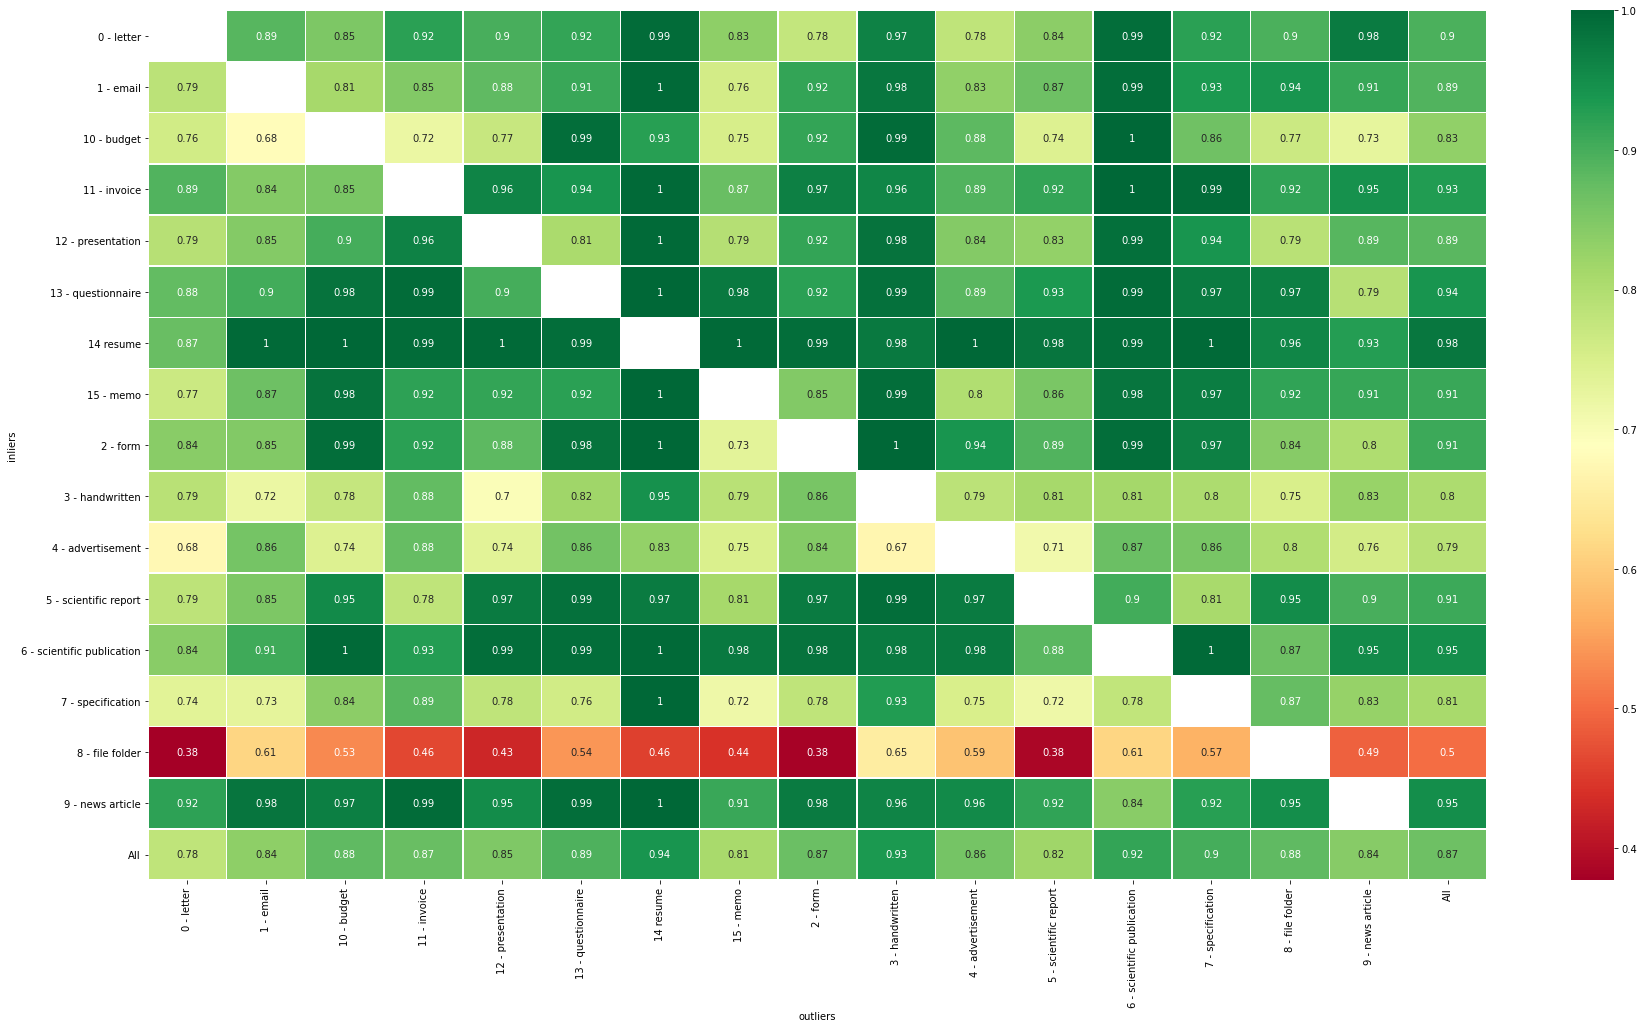

In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
data = "train"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

data_path = "/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv"
df = pd.read_csv(data_path, sep="\t")

remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}
df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
#df = df.where(df.labeled_data == 1.0).dropna()

df = df[[score, inliers, outliers]]
df = df.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

Data for test


outliers,0 - letter,1 - email,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.068203,0.002901,-0.212441,0.038615,-0.143082,0.000000,0.076679,-0.239670,-0.037829,-0.187555,-0.084442,0.097628,-0.323603,-0.162464,0.152453,-0.063641
1 - email,-0.009770,NaN,-0.004598,-0.167890,0.003446,-0.148252,-0.019868,-0.044860,0.117071,-0.083757,-0.004798,0.101767,-0.000103,-0.127450,-0.025275,0.159191,-0.017010
10 - budget,-0.081456,-0.020120,NaN,-0.098478,-0.095659,-0.013715,-0.063221,0.007816,-0.106822,-0.019868,0.105513,-0.025277,-0.096501,-0.188180,-0.329798,-0.144738,-0.078034
11 - invoice,0.098531,0.127817,0.120546,NaN,0.066024,0.105443,0.189818,0.139016,0.156246,0.007596,0.016450,0.073835,0.055571,0.108856,0.160905,0.155613,0.105485
12 - presentation,-0.001253,0.000509,-0.065863,-0.018578,NaN,-0.073945,0.028049,0.042041,-0.035172,-0.009780,-0.193725,0.156288,0.020960,-0.037306,-0.334980,0.193534,-0.021948
13 - questionnaire,0.136826,-0.058236,0.130011,-0.051905,-0.056215,NaN,0.000000,0.039838,-0.108188,-0.019868,-0.076043,0.133007,0.047390,-0.007206,-0.119182,0.022200,0.000829
14 resume,-0.103939,0.133721,0.000000,0.028049,0.332710,0.000000,NaN,0.118027,0.000000,0.000000,0.133721,0.190282,0.267442,0.068452,-0.131395,0.107720,0.076319
15 - memo,0.030921,0.006628,0.237876,0.037444,0.041433,0.100207,0.000000,NaN,-0.196928,-0.014076,-0.164733,-0.003926,0.122323,-0.090962,-0.039310,0.169494,0.015759
2 - form,-0.041017,-0.021487,-0.016986,-0.022886,-0.011076,0.087794,0.000000,-0.071430,NaN,0.000000,-0.039568,-0.161345,0.028049,-0.119697,-0.193947,-0.111615,-0.046347


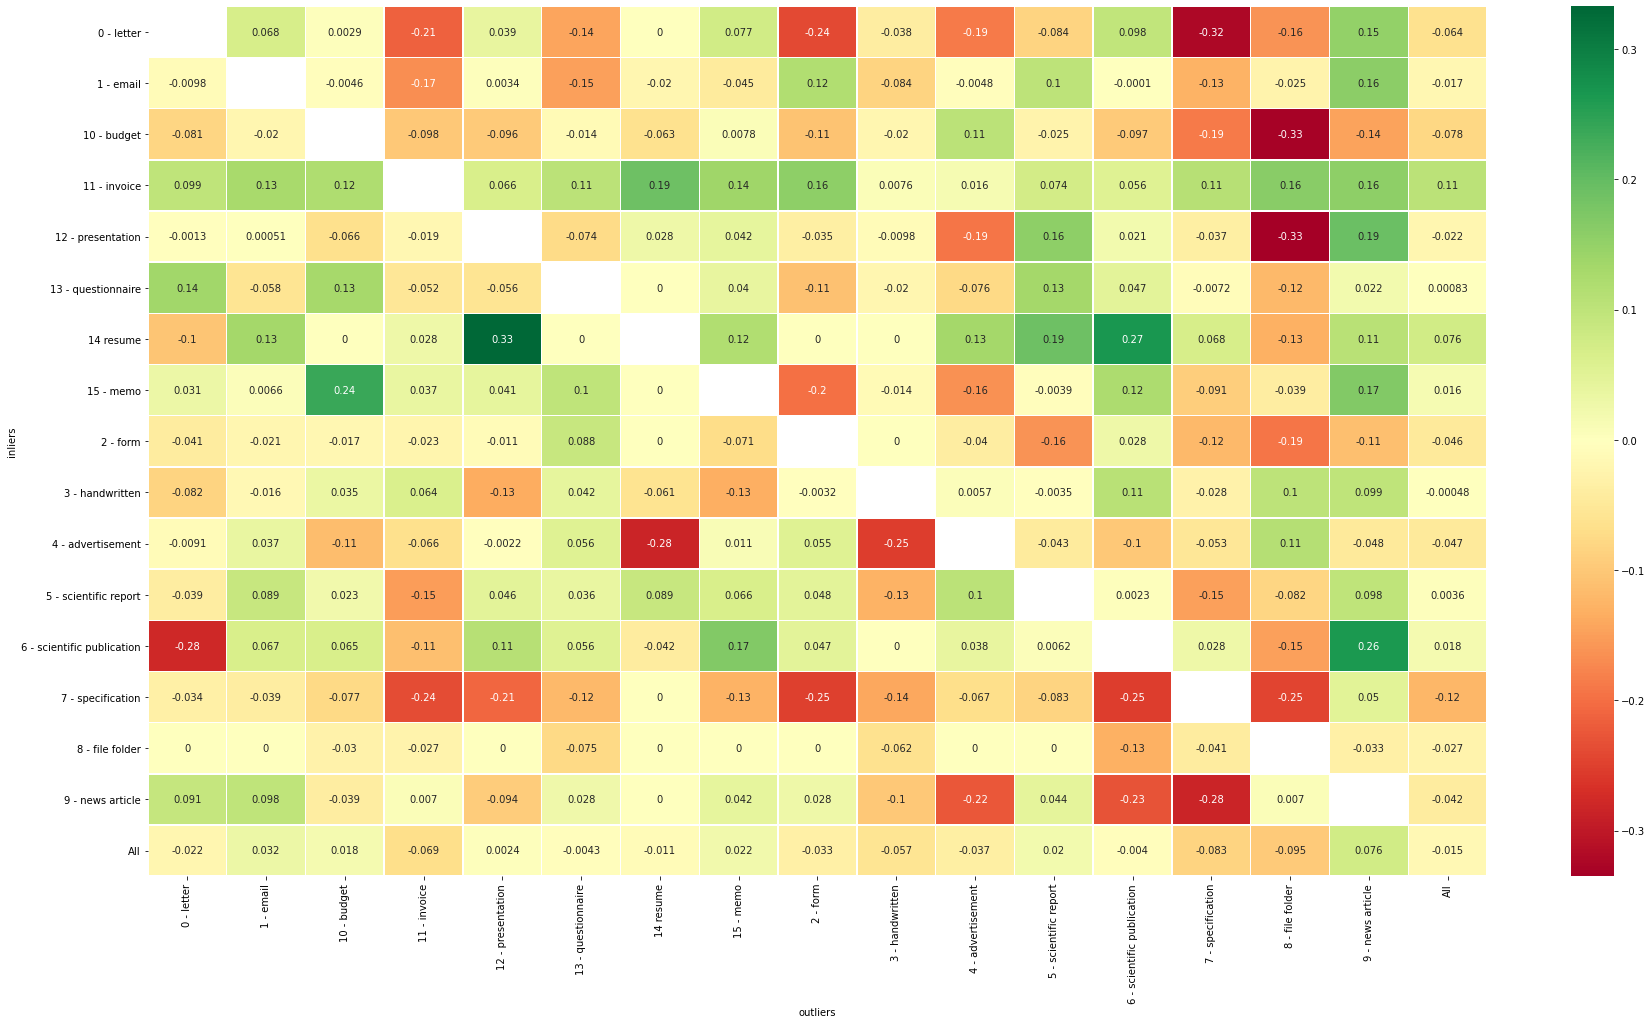

In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

data_path = "/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv"
df = pd.read_csv(data_path, sep="\t")

df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
df_semi = df.where(df.labeled_data == 0.8).dropna()[[score, inliers, outliers]]
df_super = df.where(df.labeled_data == 1.0).dropna()[[score, inliers, outliers]]

df_semi = df_semi.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df_super = df_super.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df = df_semi - df_super

print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df